# Task 2: Exploring Supervised Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\91701\\Desktop\\assingments\\student_result.csv")

In [3]:
data.head()

,hours,scores,Unnamed: 2
0,2.5,21,NaN
1,5.1,47,NaN
2,3.2,27,NaN
3,8.5,75,NaN
4,3.5,30,NaN


In [4]:
data.columns


Index(['hours', 'scores', 'Unnamed: 2'], dtype='object')

# Drop Unwanted Columns

In [5]:
data.drop(data.columns[[2]],axis=1,inplace=True)

In [6]:
data.head()

,hours,scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.count()

hours     25
scores    25
dtype: int64

In [8]:
data.describe()

,hours,scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Finding Correlation

In [10]:
corr_matrix=data.corr()
corr_matrix["scores"].sort_values(ascending=False)

scores    1.000000
hours     0.976191
Name: scores, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023AE9F2EFC8>,
      dtype=object)

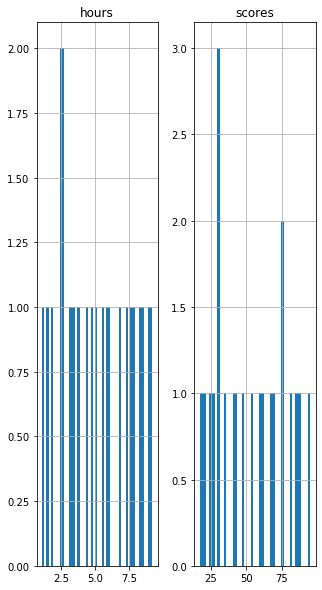

In [11]:
data.hist(bins=50,figsize=(5,10))

# Hours vs Percentage

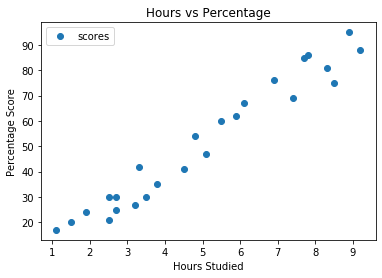

In [12]:
from matplotlib import style
data.plot(x='hours', y='scores',style="o")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

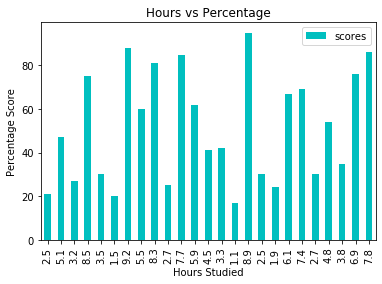

In [13]:
data.plot.bar(x="hours",y="scores",color="c")
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show(block=True)

# Splitting data into train_set and test_set

In [14]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train_set,X_test_set,Y_train_set,Y_test_set=train_test_split(X,Y,test_size=0.2,random_state=0)


# training model

In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_set,Y_train_set)
Y_predict=model.predict(X_test_set)
Y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [51]:
X_test=X_test_set.flatten()

In [52]:
Y_test_set

array([20, 27, 69, 30, 62], dtype=int64)

In [55]:
df=pd.DataFrame({"Hours":X_test,"Actual":Y_test_set,"predicted":Y_predict})

In [56]:
df

,Hours,Actual,predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


# Graph between Actual and predicted

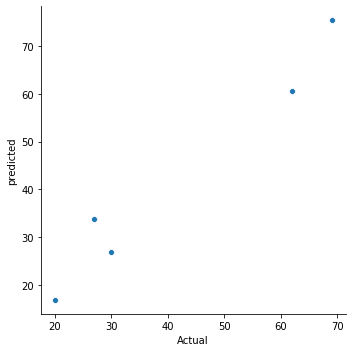

In [61]:
sns.relplot(x="Actual",y="predicted",data=df)

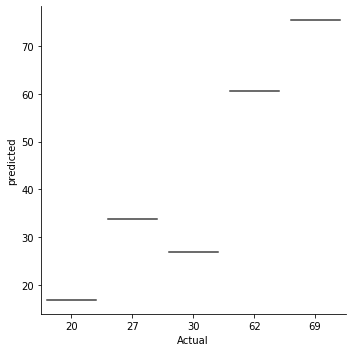

In [67]:
sns.catplot(x="Actual",y="predicted",kind='boxen',data=df)

# Plotting Regression Line

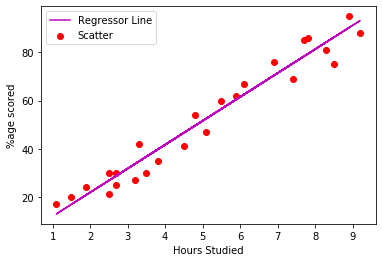

In [68]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y,color="r",label="Scatter")
plt.plot(X, line,color="m",label="Regressor Line");
plt.xlabel("Hours Studied")
plt.legend()
plt.ylabel("%age scored")
plt.show()

# Evaluating model

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test_set,Y_predict)
print("mean squared error",mean_squared_error(Y_test_set,Y_predict))
print("mean absolute error" ,mean_absolute_error(Y_test_set,Y_predict))
print("root mean squared error",np.sqrt(mse))

mean squared error 21.5987693072174
mean absolute error 4.183859899002975
root mean squared error 4.6474476121003665


In [71]:
model.predict([[9]])

array([91.21406837])

In [72]:
model.predict([[2]])

array([21.839473])